In [8]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

output_directory = '/home/marco/DataspellProjects/thesis/output/spot_check/ST002498/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FC9B31", "#FFBF00", "#A8C43C", "#50C878", "#B284BE"])
sns.set(style="whitegrid", font_scale=1.5)
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498_z.csv')

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

models = {
    'Log-reg': LogisticRegression(max_iter=500, random_state=42),
    'LDA': LinearDiscriminantAnalysis(),
    'NB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM-rbf': SVC(kernel='rbf', random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'Gradient Booster': GradientBoostingClassifier(random_state=42),
}

scores = {model_name: cross_val_score(model, X, y, cv=kfold, n_jobs=-1) for model_name, model in models.items()}
sorted_scores = {k: v for k, v in sorted(scores.items(), key=lambda item: np.mean(item[1]))}


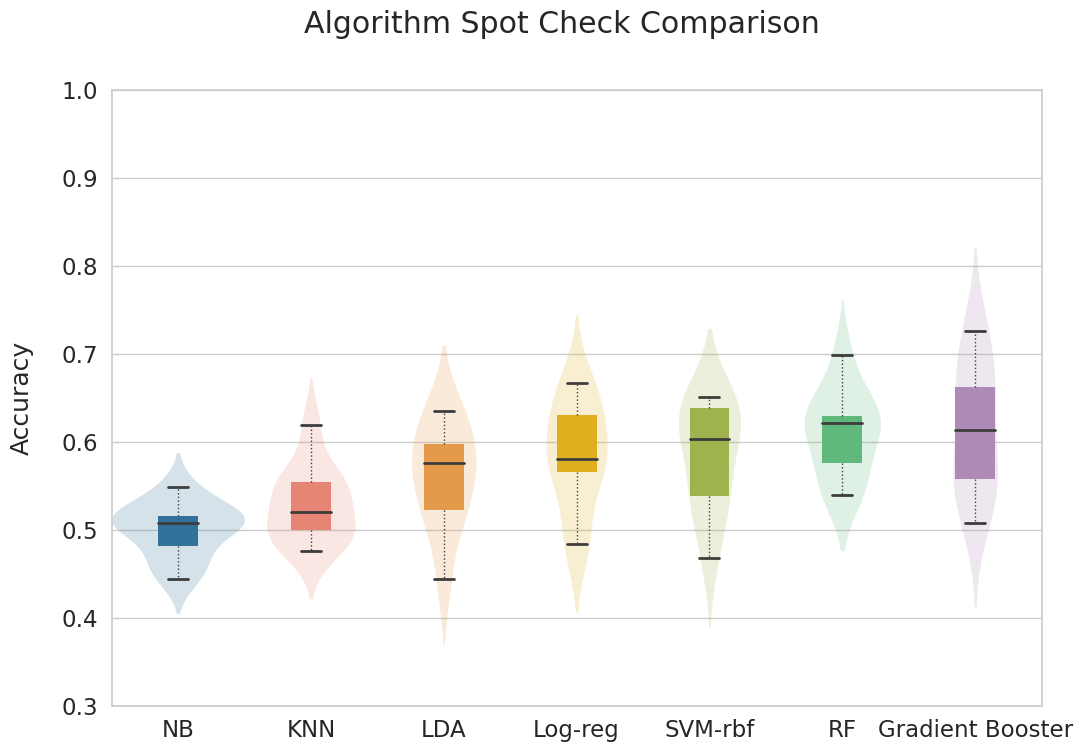

In [12]:

# Boxplot algorithm comparison
fig = plt.figure(figsize=(12, 8))
fig.suptitle('Algorithm Spot Check Comparison')
ax = sns.boxplot(data=pd.DataFrame(sorted_scores), palette=palette, linewidth=0, width=0.3,
                 medianprops=dict(linestyle='-', linewidth=2),
                 boxprops=dict(linewidth=0, alpha=1),
                 whiskerprops=dict(linestyle=':', linewidth=1),
                 capprops=dict(linestyle='-', linewidth=2))
sns.violinplot(data=pd.DataFrame(sorted_scores), palette=palette, linewidth=0, alpha=0.3, ax=ax, width=1)
plt.setp(ax.collections, alpha=.2)
plt.yticks(np.arange(0.3, 1.1, 0.1))
plt.ylabel('Accuracy', labelpad=20)
plt.savefig(output_directory + 'spot_check.png', dpi=300)
